# PoC Spamfilter maken


## Pip installs

In [1]:
# ! pip install pandas
# ! pip install nltk
# import nltk
# nltk.download()
# ! pip install sklearn
# ! pip install pickle
# ! pip install matplotlib
# ! pip install seaborn

## Load dataset (Part 1)

In [2]:
# Import
import pandas as pd

# Read and print CSV as DataFrame
df = pd.read_csv('./emails.csv')

# Show
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


## Clean text (Part 2)

In [3]:
# Import
import string
import nltk
import re

stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

# Function to apply
def Cleaner (value):
    # Remove non character
    value = re.sub('[^A-Za-z ]', '', value)
    
    # Normalize case
    value = value.lower()
    
    # Tokenize
    value = nltk.tokenize.word_tokenize(value)
    
    # Remove stopwords and lemmatize
    value = [lemmatizer.lemmatize(i) for i in value if i not in stopwords]
#     value = [stemmer.stem(i) for i in value if i not in stopwords]
    
    return ' '.join(value)

# Clean text to new column (cleaned)
df['cleaned'] = df['text'].apply(Cleaner)

# Show
df

,text,spam,cleaned
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new home made easy im wan...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject money get software cd software compati...
...,...,...,...
5723,Subject: re : research and development charges...,0,subject research development charge gpg forwar...
5724,"Subject: re : receipts from visit jim , than...",0,subject receipt visit jim thanks invitation vi...
5725,Subject: re : enron case study update wow ! a...,0,subject enron case study update wow day super ...
5726,"Subject: re : interest david , please , call...",0,subject interest david please call shirley cre...


## Classification (Part 3)

### Vectorization

In [4]:
# Import
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7)

# Fit and vectorize
matrix = vectorizer.fit_transform(df['cleaned'])

input_arr = matrix.toarray()

### Split data

In [5]:
# Import
from sklearn.model_selection import train_test_split

# Define in- and outputs
# X = df.iloc[:, 3:]
X = input_arr
# y = df.iloc[:,1]
y = df['spam'].values

# Split set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Set 80%-20% as Training and Testing

### Train Model or ...

In [6]:
from sklearn.svm import SVC

# Teach Model
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

### ... Load model

In [7]:
# # Import
# import pickle
# filename = 'SVC_TFIDF_Lemmatized.sav'

# # Load model
# classifier = pickle.load(open(filename, 'rb'))

### Test Model

In [8]:
# Import
from sklearn.metrics import accuracy_score

# Run predictions on Test set
y_pred = classifier.predict(X_test) 

### Confusion matrix

Test Data Accuracy: 0.9895


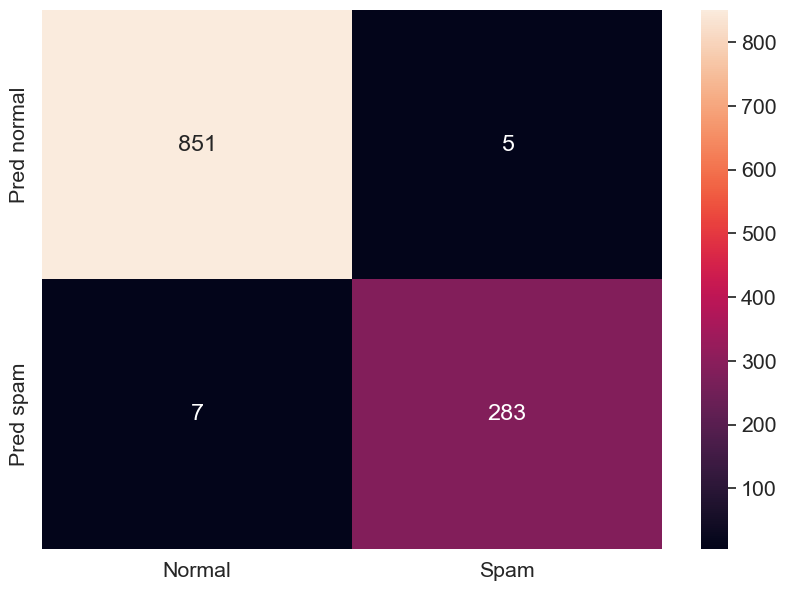

In [9]:
# Import
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = ("Pred normal", "Pred spam"), columns = ("Normal", "Spam"))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Summary report


In [10]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



## Save model (Part extra)

In [11]:
# # Import
# import pickle

# # Save model
# filename = 'SVC_TFIDF_Stemmed.sav'
# pickle.dump(classifier, open(filename, 'wb'))